-------------------------------------------
Affichage données standardisées            


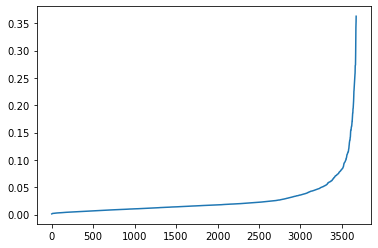

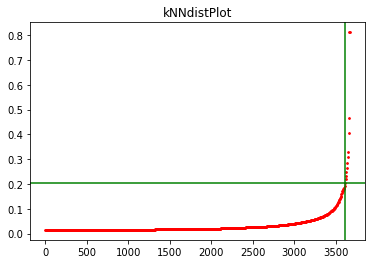

Knee value: x=3615 , y=0.2025498568891698
Estimated number of clusters: 18
Estimated number of noise points: 56


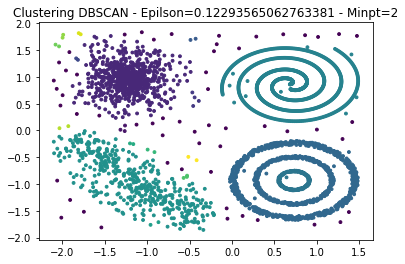

Estimated number of clusters: 8
Estimated number of noise points: 76


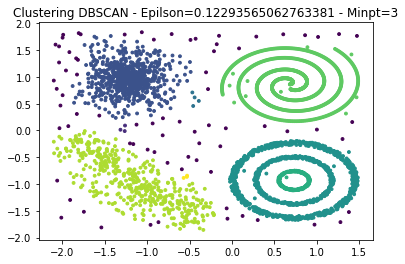

Estimated number of clusters: 5
Estimated number of noise points: 86


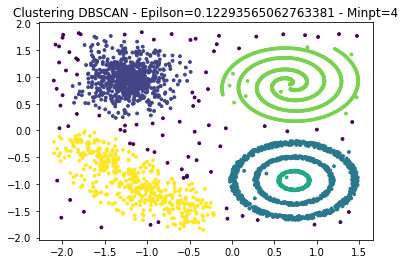

Estimated number of clusters: 8
Estimated number of noise points: 100


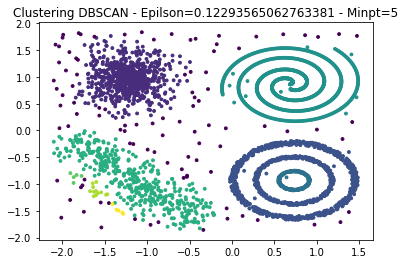

Estimated number of clusters: 6
Estimated number of noise points: 121


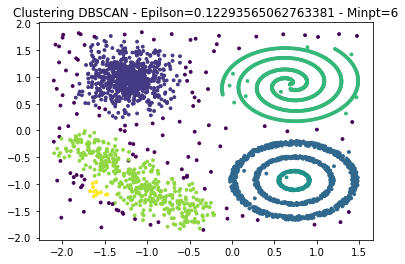

Estimated number of clusters: 8
Estimated number of noise points: 136


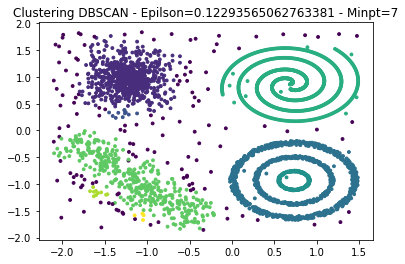

Estimated number of clusters: 8
Estimated number of noise points: 151


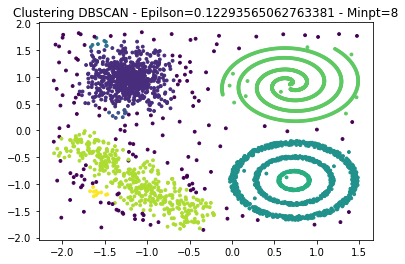

Estimated number of clusters: 8
Estimated number of noise points: 172


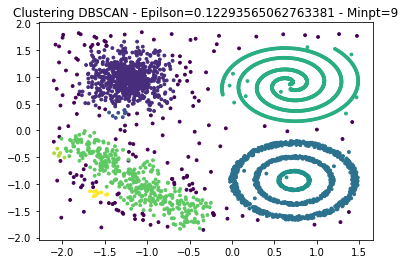

In [17]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  3 20:58:51 2021

@author: huguet


"""

import numpy as np
import matplotlib.pyplot as plt
import time
from numpy.core.fromnumeric import mean

from scipy.io import arff
from scipy.spatial import distance
from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors


##################################################################
# READ a data set (arff format)

# Parser un fichier de données au format arff
# datanp est un tableau (numpy) d'exemples avec pour chacun la liste 
# des valeurs des features

# Note 1 : 
# dans les jeux de données considérés : 2 features (dimension 2 seulement)
# t =np.array([[1,2], [3,4], [5,6], [7,8]]) 
#
# Note 2 : 
# le jeu de données contient aussi un numéro de cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
#    2d-4c-no9.arff   xclara.arff
#  2d-4c-no4    spherical_4_3 
# cluto-t8-8k  cluto-t4-8k cluto-t5-8k cluto-t7-8k diamond9 banana
path = './artificial/'
databrut = arff.loadarff(open(path+"impossible.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]
datanp = np.array([[x[0],x[1]] for x in databrut[0]])


########################################################################
# Preprocessing: standardization of data
########################################################################

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(datanp)

data_scaled = scaler.transform(datanp)

import scipy.cluster.hierarchy as shc

print("-------------------------------------------")
print("Affichage données standardisées            ")
f0_scaled = data_scaled[:,0] # tous les élements de la première colonne
f1_scaled = data_scaled[:,1] # tous les éléments de la deuxième colonne
ground_truth = np.array([[x[0],x[1],x[2]] for x in databrut[0]])[:,2]
#print(f0)
#print(f1)
"""
plt.scatter(f0_scaled, f1_scaled, s=8)
plt.title("Donnees standardisées")
plt.show()
"""
########################################################################
# Run DBSCAN clustering method 
# for a given number of parameters eps and min_samples
#  
########################################################################

def Get_distanceMean(points,minPts,previous_distanceMean):

    if (minPts < len(points)):
        nbrs = NearestNeighbors(n_neighbors=minPts).fit(points)
        distances, indices = nbrs.kneighbors(points)
        d_mean = distances.mean()
        return d_mean
    else:
        return previous_distanceMean

def KNNdist_plot(points,minPts):
    epsPlot = []
    current_distanceMean = previous_distanceMean = 0
    knee_value = knee_found = 0
    n_trainingData = 0
    for i in range (0,len(points),5):
        current_distanceMean = Get_distanceMean(points[i:],minPts,previous_distanceMean)
        df = current_distanceMean - previous_distanceMean
        
        #print("x=" + str(i) + " , df=" + str(df))
        if (df > 0.01 and i > 1 and knee_found == 0):
            knee_value = current_distanceMean
            knee_found = 1
            n_trainingData = i
            
        epsPlot.append( [i,current_distanceMean] )
        previous_distanceMean = current_distanceMean
    
    
    #Plot the kNNdistPlot
    for i in range(0, len(epsPlot)):
                plt.scatter(epsPlot[i][0],epsPlot[i][1],c='r',s=3,marker='o')
    plt.axhline(y=knee_value, color='g', linestyle='-')
    plt.axvline(x=n_trainingData , color='g', linestyle='-')
    plt.title("kNNdistPlot")
    plt.show()
    print("Knee value: x=" + str(n_trainingData) + " , y=" + str(knee_value))
    
    return knee_value


def find_best_eps_with_neighbors(data):
    neigh = NearestNeighbors(n_neighbors=3)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,2]
    plt.plot(distances)
    plt.show()

find_best_eps_with_neighbors(data_scaled)
knee_value = KNNdist_plot(data_scaled,3)

#distance=0.0218
#min_pts=4
distance=0.12293565062763381

for i in range(2,10):
# Plot results
    min_pts = i
    cl_pred = cluster.DBSCAN(eps=distance, min_samples=min_pts).fit_predict(data_scaled)
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(cl_pred)) - (1 if -1 in cl_pred else 0)
    n_noise_ = list(cl_pred).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    plt.scatter(f0_scaled, f1_scaled, c=cl_pred, s=8)
    plt.title(f"Clustering DBSCAN - Epilson={distance} - Minpt={min_pts}")
    plt.show()


-------------------------------------------
Affichage données standardisées            


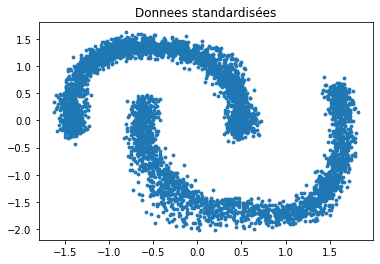

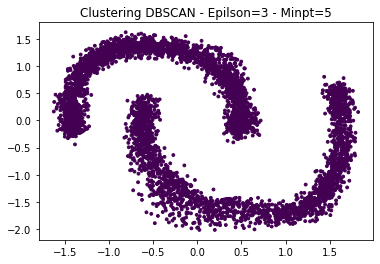

Estimated number of clusters: 1
Estimated number of noise points: 0


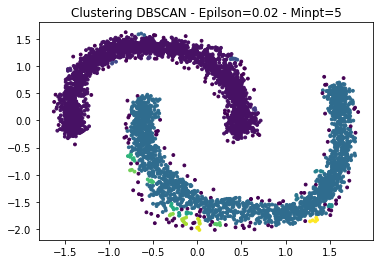

Estimated number of clusters: 23
Estimated number of noise points: 152


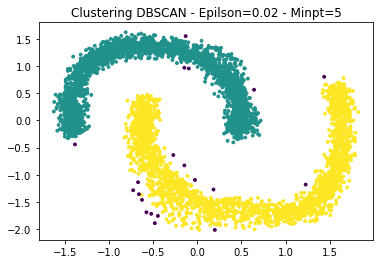

Estimated number of clusters: 2
Estimated number of noise points: 20


In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  3 20:58:51 2021

@author: huguet


"""

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

##################################################################
# READ a data set (arff format)

# Parser un fichier de données au format arff
# datanp est un tableau (numpy) d'exemples avec pour chacun la liste 
# des valeurs des features

# Note 1 : 
# dans les jeux de données considérés : 2 features (dimension 2 seulement)
# t =np.array([[1,2], [3,4], [5,6], [7,8]]) 
#
# Note 2 : 
# le jeu de données contient aussi un numéro de cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
#    2d-4c-no9.arff   xclara.arff
#  2d-4c-no4    spherical_4_3 
# cluto-t8-8k  cluto-t4-8k cluto-t5-8k cluto-t7-8k diamond9 banana
path = './artificial/'
databrut = arff.loadarff(open(path+"banana.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]
datanp = np.array([[x[0],x[1]] for x in databrut[0]])


########################################################################
# Preprocessing: standardization of data
########################################################################

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(datanp)

data_scaled = scaler.transform(datanp)

import scipy.cluster.hierarchy as shc

print("-------------------------------------------")
print("Affichage données standardisées            ")
f0_scaled = data_scaled[:,0] # tous les élements de la première colonne
f1_scaled = data_scaled[:,1] # tous les éléments de la deuxième colonne
#print(f0)
#print(f1)

plt.scatter(f0_scaled, f1_scaled, s=8)
plt.title("Donnees standardisées")
plt.show()

########################################################################
# Run DBSCAN clustering method 
# for a given number of parameters eps and min_samples
#  
distance=3
min_pts=5
cl_pred = cluster.DBSCAN(eps=distance, min_samples=min_pts).fit_predict(data)

# Plot results
plt.scatter(f0_scaled, f1_scaled, c=cl_pred, s=8)
plt.title("Clustering DBSCAN - Epilson=3 - Minpt=5")
plt.show()
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cl_pred)) - (1 if -1 in cl_pred else 0)
n_noise_ = list(cl_pred).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Another example
distance=0.01
min_pts=3
cl_pred = cluster.DBSCAN(eps=distance, min_samples=min_pts).fit_predict(data)

# Plot results
plt.scatter(f0_scaled, f1_scaled, c=cl_pred, s=8)
plt.title("Clustering DBSCAN - Epilson=0.02 - Minpt=5")
plt.show()
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cl_pred)) - (1 if -1 in cl_pred else 0)
n_noise_ = list(cl_pred).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Another example
distance=0.02
min_pts=5
cl_pred = cluster.DBSCAN(eps=distance, min_samples=min_pts).fit_predict(data)

# Plot results
plt.scatter(f0_scaled, f1_scaled, c=cl_pred, s=8)
plt.title("Clustering DBSCAN - Epilson=0.02 - Minpt=5")
plt.show()
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cl_pred)) - (1 if -1 in cl_pred else 0)
n_noise_ = list(cl_pred).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

########################################################################
# FIND "interesting" values of epsilon and min_samples 
# using distances of the k NearestNeighbors for each point of the dataset
#
# Note : a point x is considered to belong to its own neighborhood  


